In [1]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

In [2]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [16]:
ticker=['GMEXICOB.MX']
start,end='2014-01-01','2019-02-23'
closes=get_closes(ticker,start,end,freq='d')

In [17]:
ret=closes.pct_change().dropna()

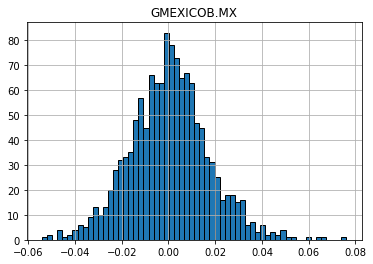

In [18]:
plt.title('GMEXICOB.MX')
plt.hist(ret['GMEXICOB.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()

In [19]:
a2014=ret.iloc[0:250,]
a2015=ret.iloc[250:501,]
a2016=ret.iloc[501:753,]
a2017=ret.iloc[753:1004,]
a2018=ret.iloc[1004:1255,]

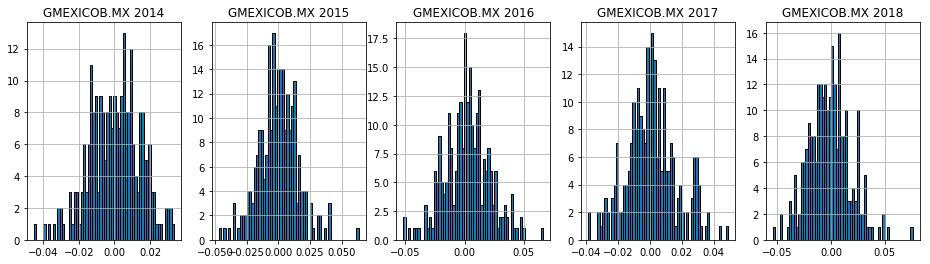

In [20]:
plt.figure(figsize=(16,4))
plt.subplot(151)
plt.title('GMEXICOB.MX 2014')
plt.hist(a2014['GMEXICOB.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(152)
plt.title('GMEXICOB.MX 2015')
plt.hist(a2015['GMEXICOB.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(153)
plt.title('GMEXICOB.MX 2016')
plt.hist(a2016['GMEXICOB.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(154)
plt.title('GMEXICOB.MX 2017')
plt.hist(a2017['GMEXICOB.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(155)
plt.title('GMEXICOB.MX 2018')
plt.hist(a2018['GMEXICOB.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()


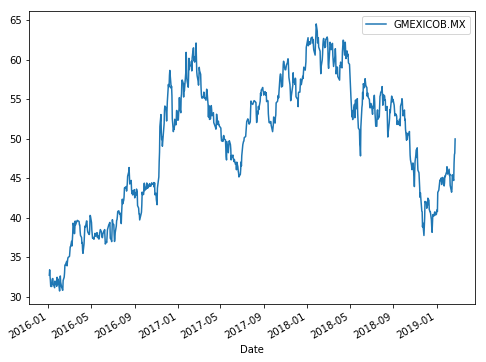

In [21]:
p1618=closes.iloc[502:1293,]
p1618.plot(figsize=(8,6))

### Cambios en los precios


<div class=text-justify> La gráfica inicia con una tendencia positva, con algunos incrementos muy marcados, esto llega hasta inicios del 2017. Inicia un periodo con tendencia negativa que termina a finales del 2017. Luego aumenta el precio de nuevo hasta inicios del 2018. El precio cae hasta 40 para inicar de nuevo un crecimiento positivo. </div>

In [22]:
ret16=p1618.pct_change().dropna()
ret_sum=pd.DataFrame(index=['Rend diario','Rend anual','Vol diaria','Vol anual'],columns=['2016','2017','2018','Todo'])
list=[a2016,a2017,a2018,ret16]
for x in range (0,4):
    ret_sum.loc['Rend diario'][ret_sum.columns[x]]=list[x]['GMEXICOB.MX'].mean()
    ret_sum.loc['Rend anual'][ret_sum.columns[x]]=list[x]['GMEXICOB.MX'].mean()*252
    ret_sum.loc['Vol diaria'][ret_sum.columns[x]]=list[x]['GMEXICOB.MX'].std()
    ret_sum.loc['Vol anual'][ret_sum.columns[x]]=list[x]['GMEXICOB.MX'].std()*np.sqrt(252)
ret_sum

,2016,2017,2018,Todo
Rend diario,0.00192584,0.000765596,-0.00148969,0.00069858
Rend anual,0.485311,0.19293,-0.375401,0.176042
Vol diaria,0.018937,0.0155971,0.019258,0.0180873
Vol anual,0.300616,0.247596,0.305711,0.287127


### Discusión datos tabla


<div class=text-justify> 2016 muestra un rendimento anual bastante alto en comparación a los otros dos años. 2018 arroja resultados de rendimeintso negativos tanto diarios como anuales. Considerando este periodo, el rendimiento anual es de .17, con volatilidad de .28  </div>

In [24]:
ret18=ret.iloc[1004:1293,]
ret_sum=pd.DataFrame(index=['Mean','Volatility'],columns=ticker)
ret_sum.loc['Mean']=ret18.mean()
ret_sum.loc['Volatility']=ret18.std()
n=1000
for x in range (0,3):
    mu= ret_sum['GMEXICOB.MX']['Mean']
    sigma= ret_sum['GMEXICOB.MX']['Volatility']
    s0=49.99
    listaepsilon = [np.random.randn() for _ in range(n)]
    epsilons = np.asarray(listaepsilon)
    epsilon = pd.DataFrame(columns = ['Epsilon', 'st1','st10','st30','st252'])
    epsilon['Epsilon']= epsilons
    epsilon['st1']= s0*np.exp((mu*.5*sigma**2)*1+sigma*np.sqrt(1)*epsilons)
    epsilon['st10']= s0*np.exp((mu*.5*sigma**2)*10+sigma*np.sqrt(10)*epsilons)
    epsilon['st30']= s0*np.exp((mu*.5*sigma**2)*30+sigma*np.sqrt(30)*epsilons)
    epsilon['st252']= s0*np.exp((mu*.5*sigma**2)*252+sigma*np.sqrt(252)*epsilons)
    st=pd.DataFrame(index=['Mean','liminf','limsup'],columns=epsilon.columns)
    st.loc['Mean']=epsilon.mean()
    st.loc['liminf']=epsilon.min()
    st.loc['limsup']=epsilon.max()
    st=st.drop('Epsilon',1)
    print(st)
    n=n*10

            st1     st10     st30    st252
Mean    49.9959  50.0714  50.2478  52.2979
liminf  46.8442  40.7023  35.0165  17.8144
limsup  52.9649  60.0168  68.6103  125.143
            st1     st10     st30    st252
Mean    50.0147  50.1337   50.361  52.7044
liminf  46.3667  39.4049  33.1058  15.1407
limsup  53.4236  61.6759  71.9287  143.502
            st1     st10     st30    st252
Mean    50.0004  50.0874  50.2787  52.4351
liminf  45.9416  38.2735  31.4769  13.0809
limsup  54.3357  65.0673  78.9164   187.74


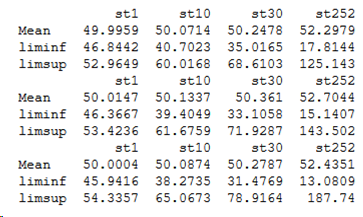